In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestTRD/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [5]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'RIVNO3', 'BIOTRNO3', 'PHYSTRNO3', 'ALLTRNO3', 'AFILTNO3', 'NO3_E3TSNAP', 'PPDIATNO3V', 'PPPHYNO3V', 'PPMRUBNO3V', 'NITR', 'NO3RAD', 'ATF_NO3', 'SMS_NO3', 'RDB_NO3', 'RDN_NO3', 'YAD_NO3'])

In [16]:
fP.variables['RIVNO3']

<class 'netCDF4._netCDF4.Variable'>
float32 RIVNO3(time_counter, deptht, y, x)
    long_name: riverine nitrate
    units: mmol N/s
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (5, 40, 898, 398)
filling on

In [6]:
np.max(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:]))

(749.3255, -1884.8323)

In [7]:
np.max(np.ma.masked_where(tmask==0,fP.variables['ATF_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['ATF_NO3'][0,:,:,:]))

(1.4866695, -2.6189249)

In [8]:
np.max(np.ma.masked_where(tmask[0,:,:]==0,fP.variables['ATF_NO3'][0,0,:,:]/fP.variables['AFILTNO3'][0,0,:,:])),np.min(np.ma.masked_where(tmask[0,:,:]==0,fP.variables['ATF_NO3'][0,0,:,:]/fP.variables['AFILTNO3'][0,0,:,:]))

(1.0, 1.0)

In [9]:
np.max(np.ma.masked_where(tmask==0,fP.variables['RDB_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['RDB_NO3'][0,:,:,:]))

(0.0, 0.0)

In [10]:
np.max(np.ma.masked_where(tmask==0,fP.variables['RDN_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['RDN_NO3'][0,:,:,:]))

(0.0, 0.0)

In [11]:
np.max(np.ma.masked_where(tmask==0,fP.variables['NO3RAD'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['NO3RAD'][0,:,:,:]))

(0.0, 0.0)

In [12]:
np.max(np.ma.masked_where(tmask==0,fP.variables['YAD_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['YAD_NO3'][0,:,:,:]))

(8258.145, -3571.1995)

In [13]:
np.max(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:]))

(749.3255, -1884.8323)

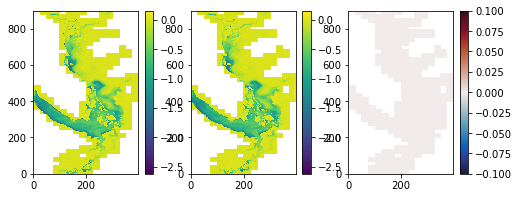

In [15]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fP.variables['AFILTNO3'][0,0,:,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fP.variables['ATF_NO3'][0,0,:,:])
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fP.variables['AFILTNO3'][0,0,:,:]-fP.variables['ATF_NO3'][0,0,:,:],cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])

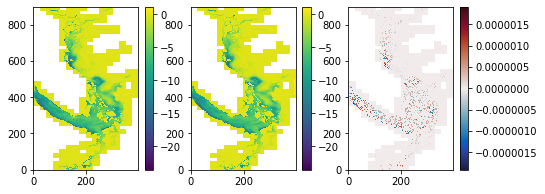

In [19]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fP.variables['BIOTRNO3'][0,0,:,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fP.variables['SMS_NO3'][0,0,:,:]/80)
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fP.variables['BIOTRNO3'][0,0,:,:]-fP.variables['SMS_NO3'][0,0,:,:]/80,cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])

In [32]:
fS=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0])
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3TVDY', 'YAD_NO3', 'LDF_NO3', 'VLDFNO3'])

In [33]:
fS.variables['YAD_NO3']

<class 'netCDF4._netCDF4.Variable'>
float32 YAD_NO3(time_counter, depthv, y, x)
    long_name: ---
    units: ---
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (3, 40, 1, 26)
filling on

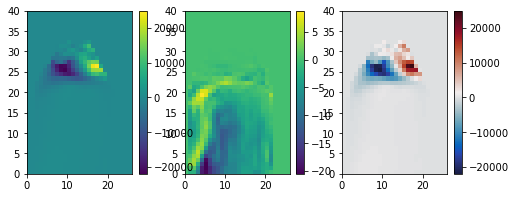

In [34]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fS.variables['YAD_NO3'][0,:,0,:]*24*3600)
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:]-fS.variables['YAD_NO3'][0,:,0,:]*24*3600,cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])